The process of Canny edge detection algorithm can be broken down to five different steps:<br>
- Apply Gaussian filter to smooth the image in order to remove the noise<br>
- Find the intensity gradients of the image<br>
- Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection<br>
- Apply double threshold to determine potential edges<br>
- Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.<br>

First let's make a simplified version of this, with tools that we learned to use:<br>
- Apply Blurring-filter<br>
- Apply Gradient calculation<br>
- Apply Thresholding<br>

In [16]:
def our_class_model(path):
    import cv2
    from matplotlib import pyplot as plt
    import numpy as np
    
    image = cv2.imread(path)
    
    # Transfrom image to its gray-version for a better highlight of edges
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Blurring Filter
    # Scanning using kernel_blurring by taking (average of each pixel)/9 with its neigbour ones
    kernel_blurring = np.array([
                                [1,1,1],
                                [1,1,1],
                                [1,1,1], 
                               ])/9 
    image_blurred = cv2.filter2D(image_gray, -1, kernel_blurring)
    
    # Edge Detection via Gradient
    image_gray_float = image_gray.astype(np.float32)
    x_kernel = np.array([-1,0,1]).astype(np.float32)
    y_kernel = np.array([
        [-1],
        [0],
        [1],
    ]).astype(np.float32)
    
    x_gardients = cv2.filter2D(image_gray_float,-1,x_kernel)
    y_gardients = cv2.filter2D(image_gray_float,-1,y_kernel)
    gardients = np.sqrt(y_gardients**2 + x_gardients**2).astype(np.float32)
    
    # Threshold into Gradient
    threshold = 50
    value = 255
    _, image_threshold = cv2.threshold(gardients, threshold, value, cv2.THRESH_BINARY)
    '''
    plt.imshow(image, cmap = "viridis" )
    plt.title("original")
    plt.show()
    plt.imshow(image_gray_float, cmap="Greys")
    plt.title("image_blurred")
    plt.show()
    plt.imshow(x_gardients,  cmap="Greys")
    plt.title("x_gardients")
    plt.show()
    plt.imshow(y_gardients,  cmap="Greys")
    plt.title("y_gardients")
    plt.show()
    plt.imshow(gardients,  cmap="Greys")
    plt.title("gardients")
    plt.show()
    plt.imshow(image_threshold, cmap="Greys")
    plt.title("threshold")
    plt.show()
    '''
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
    axes[0, 0].imshow(image)
    axes[0, 0].set_title("Original")
    axes[0, 1].imshow(image_gray_float, cmap="Greys")
    axes[0, 1].set_title("Image Blurred")
    axes[0, 2].imshow(x_gardients, cmap="Greys")
    axes[0, 2].set_title("X Gradients")
    axes[1, 0].imshow(y_gardients, cmap="Greys")
    axes[1, 0].set_title("Y Gradients")
    axes[1, 1].imshow(gardients, cmap="Greys")
    axes[1, 1].set_title("Gradients")
    axes[1, 2].imshow(image_threshold, cmap="Greys")
    axes[1, 2].set_title("Threshold into Gradients")
    # Hide axis
    for ax in axes.flat:
        ax.axis('off')
    # Adjust spacing
    plt.tight_layout()
    # Show the plot
    plt.show()

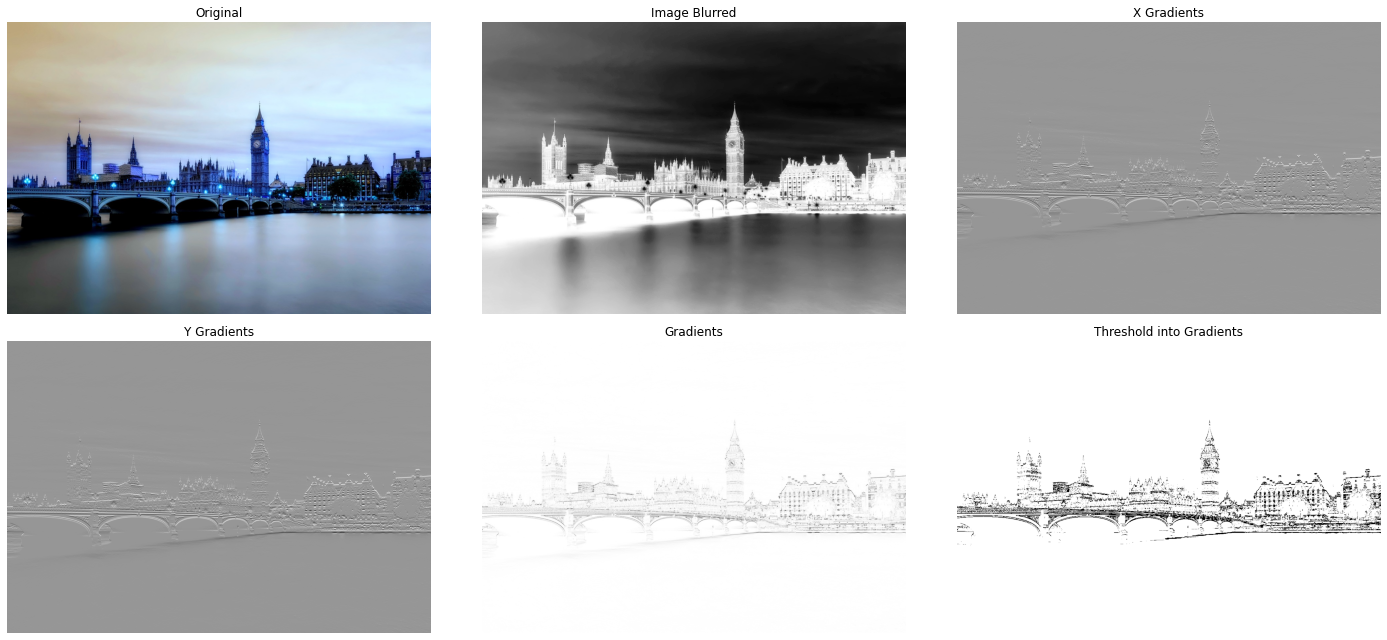

In [17]:
our_class_model("big-ben-2393098_1280.jpg")

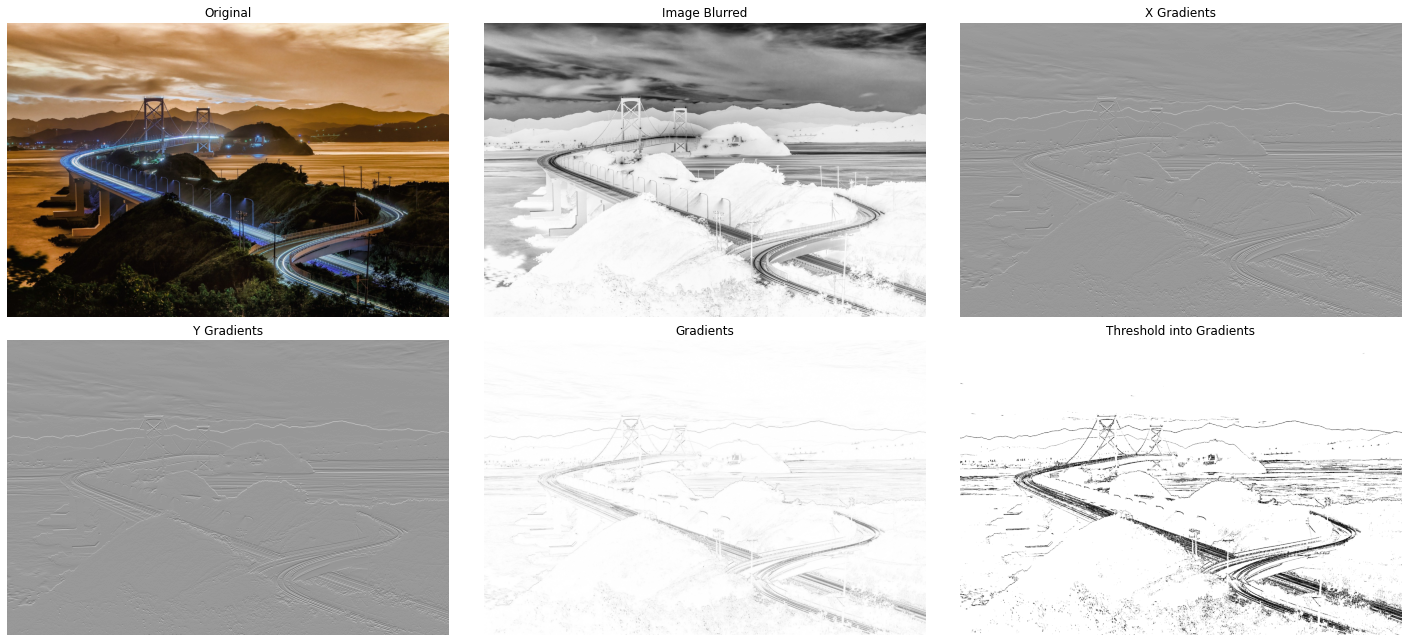

In [12]:
our_class_model("bridge.jpg")

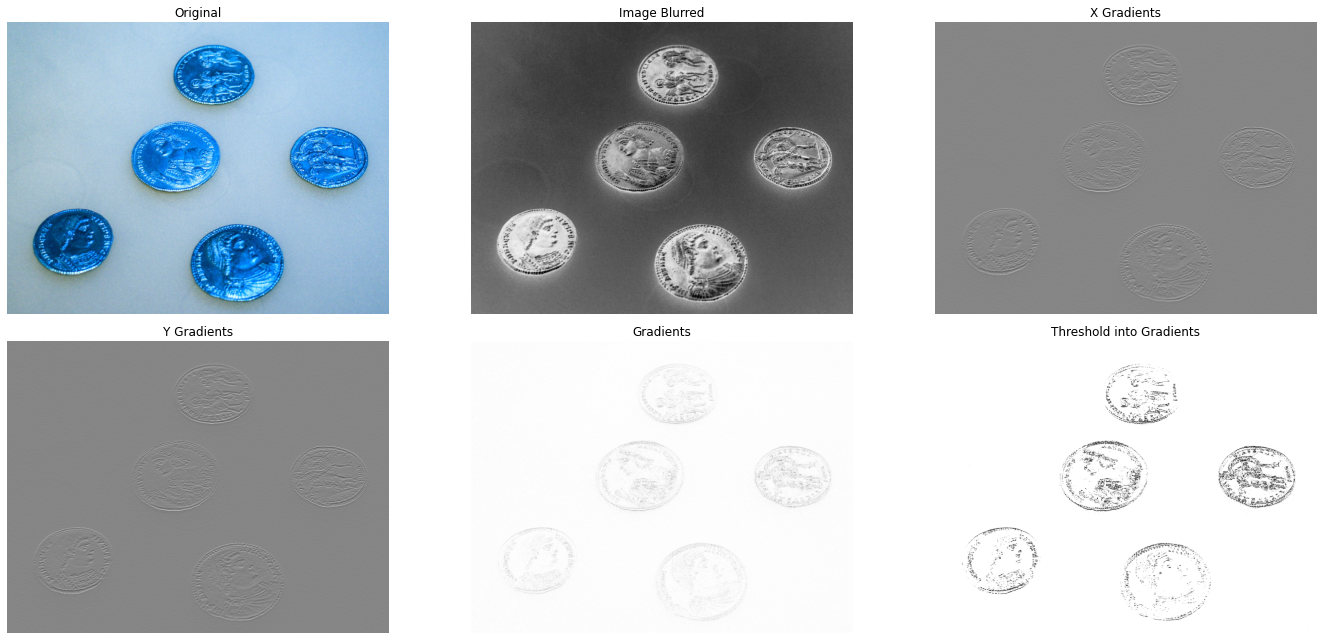

In [14]:
our_class_model("Gold_coins.jpg")

In [27]:
# https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
def canny_Edge_detector(path):
    import numpy as np
    import cv2 as cv
    from matplotlib import pyplot as plt
    
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"
    edges = cv.Canny(img,100,200)
    plt.imshow(img,cmap = 'gray')
    plt.title('Original Image')
    plt.show()
    plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image')
    plt.show()

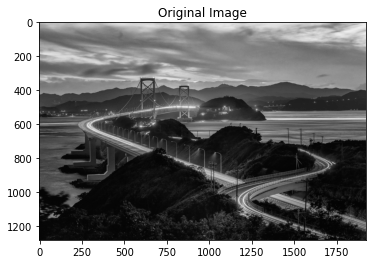

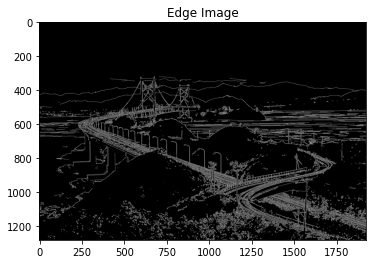

In [28]:
canny_Edge_detector("bridge.jpg")

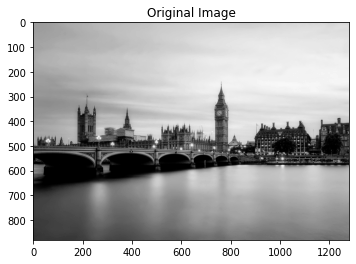

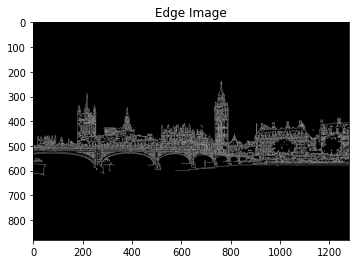

In [29]:
canny_Edge_detector("big-ben-2393098_1280.jpg")

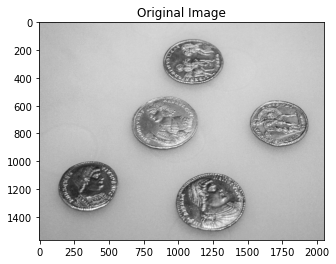

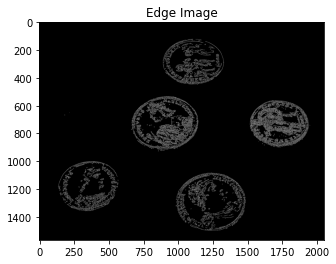

In [30]:
canny_Edge_detector("Gold_coins.jpg")